In [338]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import scipy 
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


In [339]:
df = pd.read_csv('train.csv', index_col='Id')
df_test = pd.read_csv('test.csv',  index_col='Id')

In [327]:
# df1["LandSlope"] = (pd.DataFrame(label_encoder.fit_transform(df["LandSlope"])).value_counts())
def ordinal_ch(df1):
    print(df.LandSlope.value_counts())
    LS_map = {'Gtl': 0, 'Mod': 1, 'Sev':2}
    df1['LandSlope'] = df1['LandSlope'].map(LS_map)

    LS_map = {'Unf': 1, 'RFn': 2, 'Fin':3, 'NA':0}
    df1['GarageFinish'] = df1['GarageFinish'].map(LS_map)

    LS_map = {'MnPrv': 2, 'GdPrv': 3, 'GdWo':2, 'MnWw':1, 'NA':0}
    df1['Fence'] = df1['Fence'].map(LS_map)

    LS_map = {'1Fam': 0, 'TwnhsE': 4, 'Duplex':3, 'Twnhs':5, '2fmCon':2}
    df1['BldgType'] = df1['BldgType'].map(LS_map)

    LS_map = {'SBrkr': 4, 'FuseA': 3, 'FuseF':2, 'FuseP':1, 'Mix':0}
    df1['Electrical'] = df1['Electrical'].map(LS_map)

    LS_map = {'Unf': 0, 'GLQ': 5, 'ALQ':4, 'BLQ':2, 'Rec':3, 'LwQ': 1, 'NA':0}
    df1['BsmtFinType1'] = df1['BsmtFinType1'].map(LS_map)

    LS_map = {'1Story': 0, '2Story': 3, '1.5Fin':2, 'SLvl':6, 'SFoyer':6, '1.5Unf': 1, '2.5Unf':4 , '2.5Fin':5}
    df1['HouseStyle'] = df1['HouseStyle'].map(LS_map)

    LS_map = {'Fa': 0, 'Gd': 2, 'TA':1, 'Ex':3}
    for x in ["ExterQual" , "KitchenQual"] :
        df1[x] = df1[x].map(LS_map)     # "BsmtQual" , "KitchenQual"

    LS_map = {'Fa': 1, 'Gd': 3, 'TA':2, 'Ex':4 , 'Po': 0}
    for x in ["HeatingQC" , "ExterCond"]:
        df1[x] = df1[x].map(LS_map)     # "HeatingQC" , "FireplaceQu" , "GarageQual"

    LS_map = {'Fa': 2, 'Gd': 4, 'TA':3, 'Ex':5 , 'Po': 1, 'NA':0}
    df1['FireplaceQu'] = df1['FireplaceQu'].map(LS_map)

    LS_map = {'Fa': 2, 'Gd': 4, 'TA':3,  'Po': 1, 'NA':0}
    df1['BsmtCond'] = df1['BsmtCond'].map(LS_map)

    LS_map = {'Mn': 2, 'No': 1, 'Av':3, 'Gd': 4, 'NA':0}
    df1['BsmtExposure'] = df1['BsmtExposure'].map(LS_map)

    LS_map = {'Y': 1, 'N': 0}
    df1['CentralAir'] = df1['CentralAir'].map(LS_map)

    LS_map = {'Fa': 1, 'Gd': 3, 'TA':2, 'Ex':4, 'NA':0}
    df1["BsmtQual"] = df1["BsmtQual"].map(LS_map)

In [328]:
def fill_na(df, feature):       # filling null values based on current distribution
    s = df[feature].value_counts(normalize=True)
    missing = df[feature].isnull()
    df.loc[missing,feature] = np.random.choice(s.index, size=len(df[missing]),p=s.values)
def remod(df):
    if df['YearBuilt'] == df['YearRemodAdd']:
        res=0
    else:
        res=1
    return res

In [329]:
def prep(df):
    # Alley - many are null values, won't be useful
    # PoolArea - 1453/1460 are 0's
    filling_NA = ["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "Fence", "MiscFeature"]
    for x in filling_NA:
        df[x].fillna('NA', inplace=True)  # special care, NA represents no fence, not value absent
    for i in df.columns:
        fill_na(df,i)
    # df['YearRemodAdd']=df.apply(remod,axis=1) #useless, remodelling is not of that much use most probably
    df['Bath'] = df['FullBath'] + df['HalfBath'] + df['BsmtFullBath'] + df['BsmtHalfBath']
    df['Porch'] = df['OpenPorchSF'] + df['3SsnPorch']  + df['ScreenPorch'] + df['EnclosedPorch'] + df['WoodDeckSF']
    df['GarageYear'] = pd.cut(x=df['GarageYrBlt'], bins=[1900, 1933, 1946, 1969, 1981,1990, 1993, 2002, 2010], labels=[0, 1, 2, 3, 4, 5, 6, 7])
    df['HouseYear'] = pd.cut(x=df['YearBuilt'], bins=[1872, 1915, 1931,1941, 1956,1972, 1980, 1991, 2002, 2010], labels=[0, 1, 2, 3, 4, 5,6,7,8])
    # df['BsmtFinSF'] = (df['BsmtFinSF1'] + df['BsmtFinSF2'])/2
    dropin = ["MiscFeature",'FullBath', 'HalfBath','BsmtFullBath','BsmtHalfBath', 'GarageYrBlt', 'Heating','GarageArea', 'YearBuilt', 'Alley', 'PoolArea',"PoolQC", "Functional", "GarageCond", "GarageQual", "PavedDrive", "SaleType", "Utilities",'BsmtFinSF2', 'BsmtFinSF1', 'OpenPorchSF','3SsnPorch','ScreenPorch', 'BsmtFinType2', 'WoodDeckSF', 'EnclosedPorch']
    df.drop(dropin,axis=1,inplace=True)
    
    return df

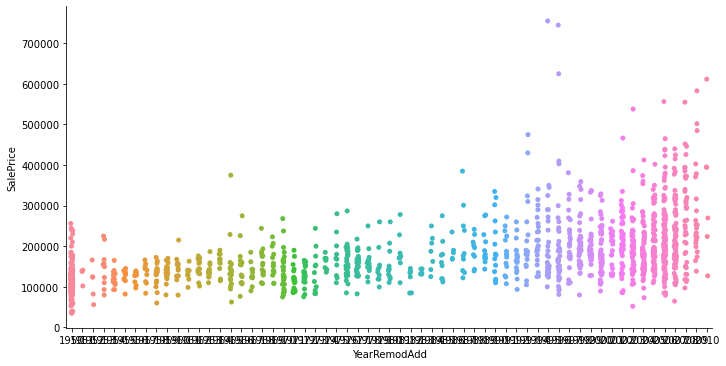

In [331]:
# sns.catplot(x='GarageYrBlt',y='SalePrice',data=df,aspect=10)
# df.GarageYrBlt.describe() 
#making bins for Garage Year Built
# sns.catplot(x='YearBuilt',y='SalePrice',data=df,aspect=2)
sns.catplot(x='YearRemodAdd',y='SalePrice',data=df,aspect=2)

In [332]:
df.value_counts()
# df.LotShape.fillna(df.LotConfig.mode(),inplace=True)
# plt.bar(df.LotConfig,df.SalePrice)

Series([], dtype: int64)

<AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>

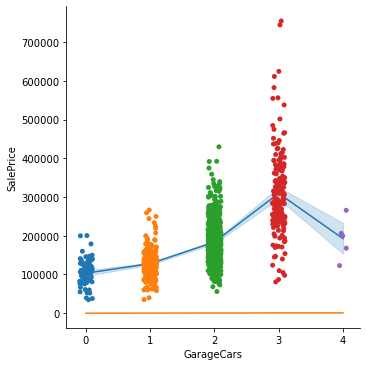

In [333]:
sns.catplot(x='GarageCars',y='SalePrice',data=df)
sns.lineplot(x='GarageCars',y='SalePrice',data=df)
sns.lineplot(x='GarageCars',y='GarageArea',data=df)
#dropping Garage Area and will use Garage Cars for the same, as both represent the same thing

In [334]:
from sklearn.linear_model import LinearRegression
sub = df[['OpenPorchSF', '3SsnPorch','ScreenPorch','EnclosedPorch']]
m1 = LinearRegression().fit(sub,df.SalePrice)
m1.score(sub,df.SalePrice)
coef = m1.coef_
inter = m1.intercept_

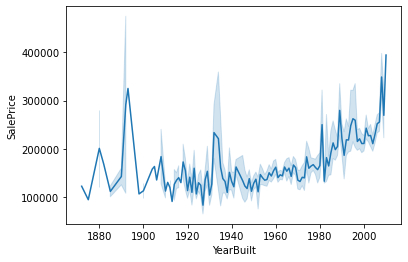

In [304]:
# sns.catplot(x='YearBuilt',y='SalePrice',data=df)
sns.lineplot(x='YearBuilt',y='SalePrice',data=df)
# sns.lineplot(x='YearBuilt',y='GarageArea',data=df)/
df['HouseYear'] = pd.cut(x=df['YearBuilt'], bins=[1872, 1910, 1950, 1980, 1990, 2002, 2010], labels=[0, 1, 2, 3, 4, 5])

In [305]:
# df.corr().OverallCond # we can consider dropping this,, less correlation with Sale Price

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

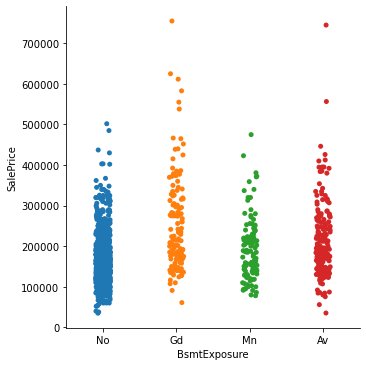

In [306]:
sns.catplot(x='BsmtExposure',y='SalePrice',data=df) # we can drop this
df.BsmtExposure.value_counts()

In [307]:
# df['BsmtFinSF'] = (df['BsmtFinSF1'] + df['BsmtFinSF2'])/2
# df.drop(['BsmtFinSF1', 'BsmtFinSF2'],axis=1,inplace=True)

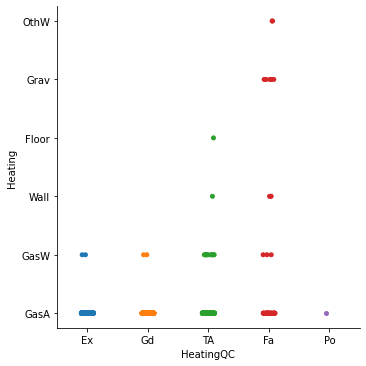

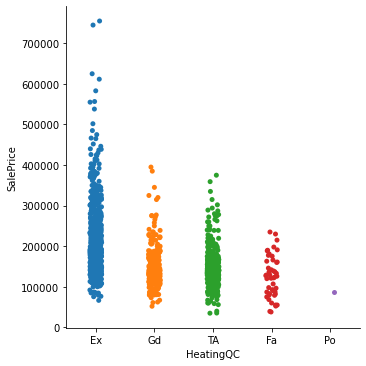

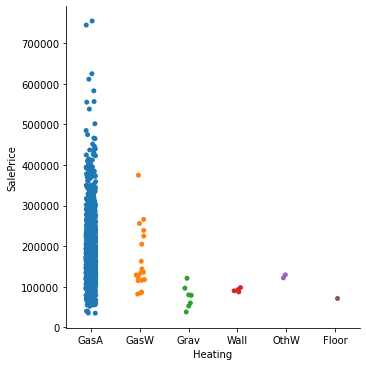

In [308]:
sns.catplot(x='HeatingQC',y='Heating',data=df)
sns.catplot(x='HeatingQC',y='SalePrice',data=df)
sns.catplot(x='Heating',y='SalePrice',data=df)

In [309]:
# from sklearn.ensemble import RandomForestRegressor
# regr = RandomForestRegressor(max_depth=2, random_state=0)
# df = prep(df)
# y = df['SalePrice']
# df.drop(['SalePrice'],axis=1,inplace=True)
# regr.fit(df, y)
# df.info()

In [310]:
# ordinal  encoding on features that require that treatment, and on rest label encoding , using for loop.

Now we will change the object type to numerical or float/int type. For this I will use label encoding and ordinal encoding, depending on the data description.
Heating --- doubt

can drop "Functional", "GarageCond", "GarageQual", "PavedDrive", "MiscFeature", "SaleType", "Utilities"

In [311]:
def prep2(df):    
    enc_df = pd.DataFrame(me.transform(df[labels]).toarray())
    df1 = df.join(enc_df)
    df1.drop(labels, axis=1,inplace=True)
    df1.fillna(0, inplace=True) # not sure abbout this
    ordinal_ch(df1)
    return df1

In [312]:
labels = ["MSZoning", "Street", "LotShape", "LandContour", "LotConfig", "Neighborhood","Condition1", "Condition2", "RoofStyle", "RoofMatl", "Exterior1st", "Exterior2nd", "MasVnrType", "Foundation", "GarageType", "SaleCondition"]
# labels = labels.append(["MiscFeature", 'Heating','GarageArea', 'PoolArea',"PoolQC", "Functional", "GarageCond", "GarageQual", "PavedDrive", "SaleType", "Utilities"])

ordinals = ["LandSlope", "BldgType", "HouseStyle", "ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "HeatingQC", "Heating", "CentralAir", "Electrical", "KitchenQual", "FireplaceQu", "GarageFinish","Fence"]

In [313]:
# for x in ordinals:
#     print(df[x].value_counts())
y = df['SalePrice']
df.drop(['SalePrice'], axis=1, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.25, random_state=42)

In [314]:
label_encoder = preprocessing.LabelEncoder()
enc = OneHotEncoder(handle_unknown='ignore')
me = (enc.fit(X_train[labels]))
# end_df = me.transform(df[labels]).toarray()

In [315]:
X_train = prep(X_train)
X_test = prep(X_test)
X_train = prep2(X_train)
X_test = prep2(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


TypeError: Could not convert RLRLRLRLRLRLRLRLRLRLRMRLRLRMRLRLRLRLRLRMRLRLRMFVRLRMRLRLRLRLRLRMRMRLRMRLRLRHRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLFVFVRLRLRLRLRMFVRLRLRLRMFVRLRLRLRLRLRLFVRLRLRMRLRLRLRMRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRMRLRLRLC (all)RLRLRMRMRLRLRLRMRLRLRLRLRLRLRMRLRMRMRLRLRLRLRLRMRLRLRLRLRHRLRLRLRLFVRLRLRLRLRLRMFVRMRLRLRMRLRLRLFVRLRLRLRLRLRLRLRLRLRLRLRLRMRLRLRLRLRLRLRLRLRLRLRMRMRLRLRLRLRLRLRLRLRMRMRLRLRLRLRLRLRMRLRLRMRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLFVRLRLRLRLRLFVRLRLRLFVRMRLRLRLRLRLRHRLRLRLRLRLRLRLRMRLRLRLRLFVRMRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRMRLRMRLRMRLRLRLRMRLRLRLFVFVRLRLRLRLRLRMRLRLRLRLRLRLRLRLRMRMRLRLRLRLRLFVRLRMRLRLRLRLRLRLRLRLRLRLRLRLRLRLRMRLRMRMRLRLRLRMRLRLRLRLRLRMRLRLRMFVRLRLRLRLRLRLRLRMRLRMRLRLRLFVRLRLRLRMRLRLRLRMRLRLRLRMRLRLRMRLRMRLC (all)RLRLFVRLRLRMFVRLRLRMRLRLRLRMRLRLRMRLRLRLRLRLRLRMRMRLRLRMRLRLFVRLRLRLRLRLRLFVRLRLFVRMRLRMRLRLRLRLFVRLFVRMRLRLRLRLRHRLRMFVRLRLRLRLRLFVRLRLRMRLRLRLRLRLRLRLRLRLRMRLRLRLRLRMRMRLRLRLRLRLRLRLFVRLRMRLRMRLRLRLRLRLRLRLRLRLRMRLRLC (all)RLRLRLRMRLRLRMRLRHRMRLRLRLRLRLRMRMRMRLRLRMRLRMRLRLRLRLRLRLRLRMRLRLRMRLRLRMRLRLRLRLRLRMRLRLRLRLRLRMRLRLRLRMRMRLRHRLRLRLRLRMRMFVRMRLRLRLRLRLRLRMRHRLRLRLRMRLRLRLRLRLRLRLRLRMRLRMRLRMRLRLRMRLFVRLRLRLRLRLRLRMRLRLRLRLRLRLRLRLFVRMRLRLRMRLRLRLRLRLRLRMRLRLRLRLRLRLRLRLRLRLRLRLRLRMRMRMRLRLRLRLRMRLRLRLRMRLRLRLRMRMRLRLRLRLRLRLRMRLRMRLFVRLRLC (all)RLRMRLRLRLRLRLRLRMRLRLRLRMRLRLRLRLRLRMRLRLRLRHRLRMRMRLRLRLRLRLRMRLRLRLRLRLRMRLRMRLRLRLRMRMRMRLRLRMRLRLRLRLRLRLRLRLRMFVRLRLRLRLRLRLRLRLRLRLRLFVRMRLRLRMRMRMRLRLRLRLRLRLRLRMRLRLRLRLRLRLRLRMRLFVRLRLRLRLRLRLRLRLRLRLRLRLRLRMRLRLFVRLRLRLRMRLRMRLRLRLRLRLRLRLRLFVRLRLRLRLFVRMRLRLRMRLRMRLRLRHRLRLRLRMRLRLRLRLRLRLRLRLRMRLRLRLRMRLRMRLRLRLRMRMRLRLFVRLRLRLRLRMRLRLFVRLRLRLRLRLRMRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRMRLRLRMRLRLRLRLFVRLRLRLRMRHRLRLRLRLRLRLRLRLRLFVRLRLRLRLRLRLRMRLRLRLRLRLRLRLRHRLRLRMRLRLRLRLRLRLRLRLRLRLRLRHRLRLRLRMRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRMRLRLRLRLRLRLRLRLRLRLRLRMRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRLRMRLRLRMRLRLRLRMRLRLRMRMRMRLRLRLRLRLRLRLRMRLRLRLRLRMRLRHRLRLRLFVRLRLRMFVRLRLFVFVRLRLRLRLRMRLRMRMRLRLRLRHRLRLRLRLRLRLRLRLRLRLRLFVRLRLRLRMRLRLRLRLRLRL to numeric

In [ ]:
#Scaling data
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler(with_centering=True, with_scaling=True, quantile_range=(20.0, 85.0), unit_variance=True)
scaler.fit(X_train)
X_train = scaler.transform(X_train)

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
regr = RandomForestRegressor(n_estimators=100, max_depth=40, max_leaf_nodes=100, min_samples_leaf=1, min_samples_split=0.00001, random_state=4200)
m1 = regr.fit(X_train,y_train)
m1.score(X_train,y_train)

In [ ]:
y_pred = np.log(m1.predict(X_test))

In [288]:
from sklearn.metrics import mean_squared_error

rms = mean_squared_error(np.log(y_test), y_pred, squared=False)
print(rms)

0.14563600966537324


In [335]:
df = prep(df)
df_test = prep(df_test)
df = prep2(df)
df_test = prep2(df_test)

Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
0    1382
1      65
2      13
Name: LandSlope, dtype: int64


In [228]:
Y_pred = m1.predict(df_test)
submission = pd.DataFrame({
        "Id": df_test.index,
        "SalePrice": Y_pred
    })

In [64]:
submission.to_csv('submission.csv', index=False)

In [159]:
df['YearRemodAdd']

Id
1       60
2       20
3       60
4       70
5       60
        ..
1456    60
1457    20
1458    70
1459    20
1460    20
Name: YearRemodAdd, Length: 1460, dtype: int64